# Developement of a Comprehensive Sleep Quality Predicting System

In this project we aim to integrate critical sleep metrics such as efficiency, duration, REM, and deep sleep percentages, along with awak-enings, into a singular, comprehensive sleep quality score. For this purpose, we show the process to get to this objective going through the different stages of the Data Science Lifecycle.

# Data Acquisition

For this project we used the data provided in  https://www.kaggle.com/code/hexenmeiser/sleep-efficiency-dataset-eda-and-scoring that contains the information of sleep features for 618 subjects man and woman of different age ranges.

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/3262257714.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Sleep_Efficiency_Updated.csv')

In [3]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


# Exploratory Data Analysis
Here we proceed with the EDA of our raw data to transform it to be used in our analysis. Visualizations is also used to analyze the transformations needed for the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      618 non-null    int64  
 1   Age                     618 non-null    int64  
 2   Gender                  618 non-null    object 
 3   Bedtime                 618 non-null    object 
 4   Wakeup time             618 non-null    object 
 5   Sleep duration          618 non-null    float64
 6   Sleep efficiency        618 non-null    float64
 7   REM sleep percentage    618 non-null    int64  
 8   Deep sleep percentage   618 non-null    int64  
 9   Light sleep percentage  618 non-null    int64  
 10  Awakenings              591 non-null    float64
 11  Caffeine consumption    582 non-null    float64
 12  Alcohol consumption     597 non-null    float64
 13  Smoking status          618 non-null    object 
 14  Exercise frequency      611 non-null    fl

### Checking for null values

From the information obtained previously it is identified that there are null values in some of the columns of our dataset. So we proceed to make a more detailed analysis on this unwanted values.

<Axes: >

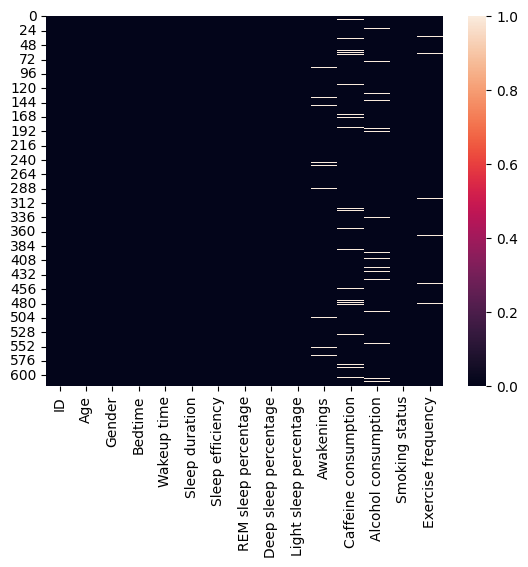

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                27
Caffeine consumption      36
Alcohol consumption       21
Smoking status             0
Exercise frequency         7
dtype: int64

### Analysis and transformation of null values
Now that the null values have been identified in the 'Awakenings', 'Caffeine consumption' and 'Alcohol consumption' we proceed to analyze each of these features and determine the transformation that will be implemented to the null values. 

**Null values in Awakenings**

In [7]:
df['Awakenings'].isnull().sum()

27

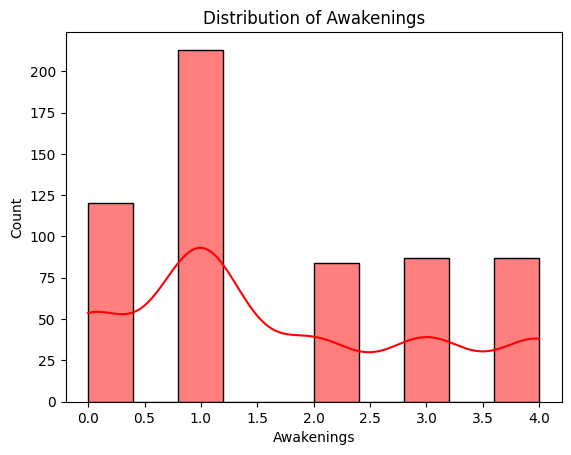

In [8]:
sns.histplot(df['Awakenings'], bins=10, kde=True, color='red')
plt.title('Distribution of Awakenings');

In [9]:
df['Awakenings'].describe()

count    591.000000
mean       1.675127
std        1.343928
min        0.000000
25%        1.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Awakenings, dtype: float64

In [10]:
df['Awakenings'].fillna(df['Awakenings'].mean().round(), inplace=True)

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/430329569.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Awakenings'].fillna(df['Awakenings'].mean().round(), inplace=True)


In [11]:
df['Awakenings'].isna().sum()

0

**Null values in Caffeine Consumption**

In [12]:
df['Caffeine consumption'].isnull().sum()

36

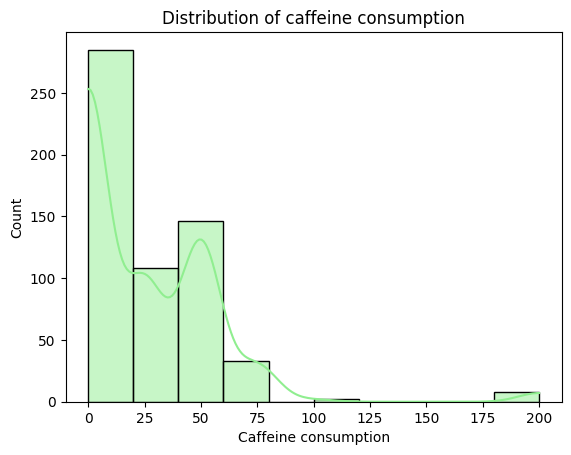

In [13]:
sns.histplot(df['Caffeine consumption'], bins=10, kde=True, color='lightgreen')
plt.title('Distribution of caffeine consumption');

In [14]:
df['Caffeine consumption'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 618 entries, 0 to 617
Series name: Caffeine consumption
Non-Null Count  Dtype  
--------------  -----  
582 non-null    float64
dtypes: float64(1)
memory usage: 5.0 KB


In [15]:
df['Caffeine consumption'].describe()

count    582.000000
mean      24.527491
std       32.349082
min        0.000000
25%        0.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Caffeine consumption, dtype: float64

In [16]:
df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean().round(), inplace=True)

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/2544895591.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Caffeine consumption'].fillna(df['Caffeine consumption'].mean().round(), inplace=True)


In [17]:
df['Caffeine consumption'].isna().sum()

0

**Null values in Alcohol Consumption**

In [18]:
df['Alcohol consumption'].isnull().sum()

21

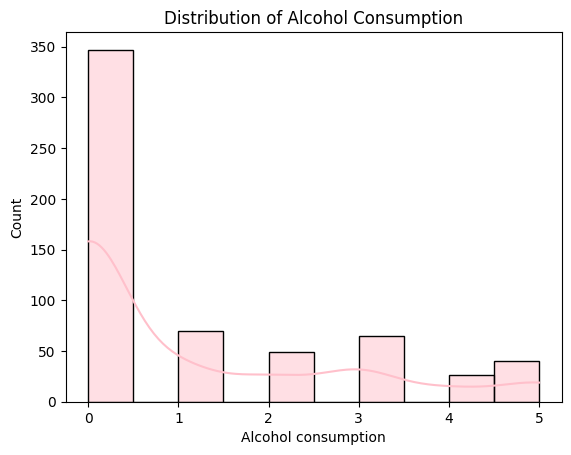

In [19]:
sns.histplot(df['Alcohol consumption'], bins=10, kde=True, color='pink')
plt.title('Distribution of Alcohol Consumption');

In [20]:
df['Alcohol consumption'].describe()

count    597.000000
mean       1.117253
std        1.597918
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Alcohol consumption, dtype: float64

In [21]:
df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean().round(), inplace=True)

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/3327202311.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol consumption'].fillna(df['Alcohol consumption'].mean().round(), inplace=True)


In [22]:
df['Alcohol consumption'].isnull().sum()

0

**Null values in Exercise Frequency**

In [23]:
df[df['Exercise frequency'].isnull()]

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
33,34,37,Female,28/11/2021 00:30,28/11/2021 07:30,7.0,0.90,28,53,19,0.0,25.0,1.0,Yes,NaN
62,63,29,Male,03/05/2021 21:00,03/05/2021 05:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,NaN
262,263,31,Female,08/11/2021 21:00,08/11/2021 06:00,9.0,0.76,23,60,17,4.0,50.0,0.0,No,NaN
304,305,25,Male,01/05/2021 00:00,01/05/2021 08:00,8.0,0.84,15,70,15,4.0,0.0,4.0,No,NaN
366,367,52,Male,13/10/2021 23:00,13/10/2021 07:00,8.0,0.82,20,70,10,3.0,75.0,0.0,No,NaN
446,447,23,Male,21/04/2021 00:00,21/04/2021 07:00,7.0,0.50,15,40,45,2.0,0.0,4.0,Yes,NaN
480,481,29,Male,03/05/2021 21:00,03/05/2021 05:00,8.0,0.81,15,67,18,1.0,200.0,0.0,No,NaN


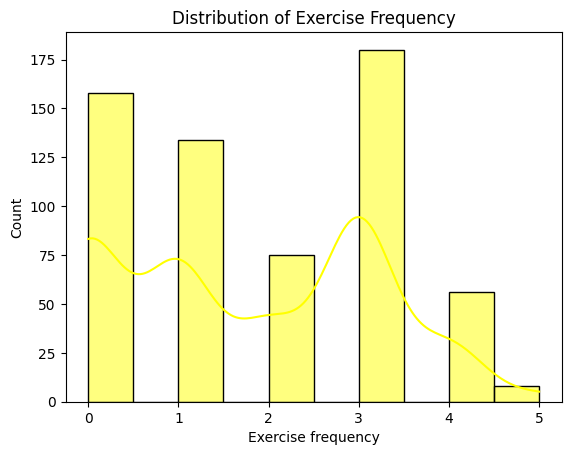

In [24]:
sns.histplot(df['Exercise frequency'], bins=10, kde=True, color='yellow')
plt.title('Distribution of Exercise Frequency');

In [25]:
df['Exercise frequency'].describe()

count    611.000000
mean       1.780687
std        1.409925
min        0.000000
25%        0.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Exercise frequency, dtype: float64

In [26]:
df['Exercise frequency'].mode()

0    3.0
Name: Exercise frequency, dtype: float64

In [27]:
df['Exercise frequency'].fillna(3.0,inplace = True)

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/847820297.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Exercise frequency'].fillna(3.0,inplace = True)


In [28]:
df['Exercise frequency'].isna().sum()

0

**Verification: Our transformed data has no null values and is ready to be used**

In [29]:
df.isna().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

## Visualizing and Understanding Data:

Now we Analyze the main features of our dataset through visualizationsd to understand the relationship between them for the next step in the implementaion of the models.

In [30]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

### Age and Gender

,count
Gender,
Male,319
Female,299


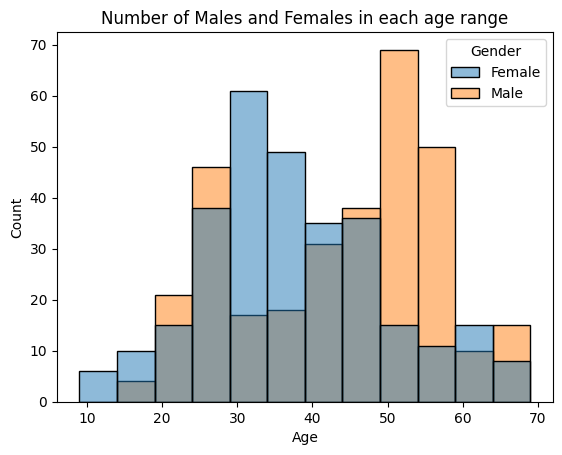

In [31]:
sns.histplot(data=df, x='Age', hue= 'Gender')
plt.title('Number of Males and Females in each age range')
gender_counts = df['Gender'].value_counts()
gender_counts= pd.DataFrame(gender_counts)
gender_counts

### Sleep Efficiency

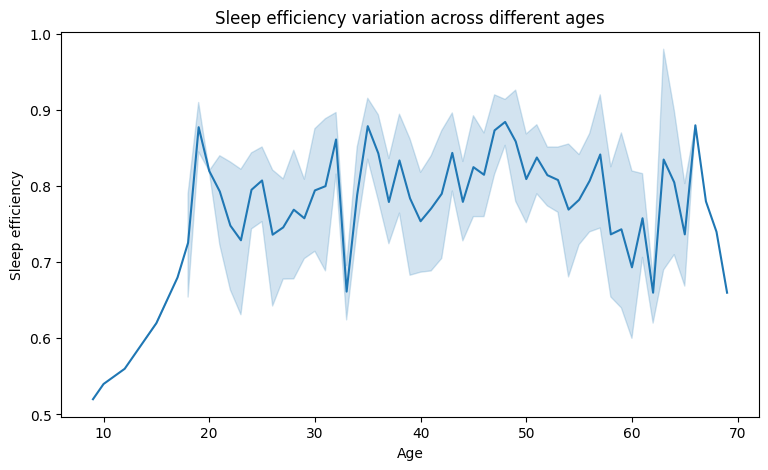

In [32]:
plt.figure(figsize=(9, 5))
sns.lineplot(data = df, x='Age', y='Sleep efficiency')
plt.title('Sleep efficiency variation across different ages')
plt.plot;

### Sleep Duration

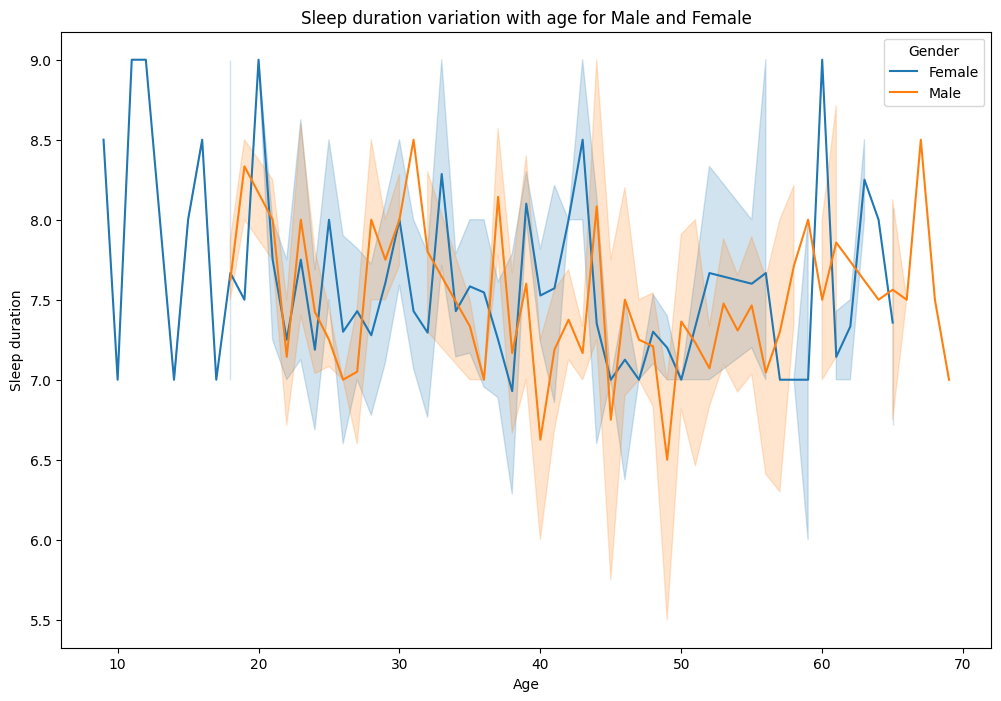

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data = df, x='Age', y='Sleep duration', hue='Gender')
plt.title('Sleep duration variation with age for Male and Female')
plt.plot;

### Caffeine Consumption

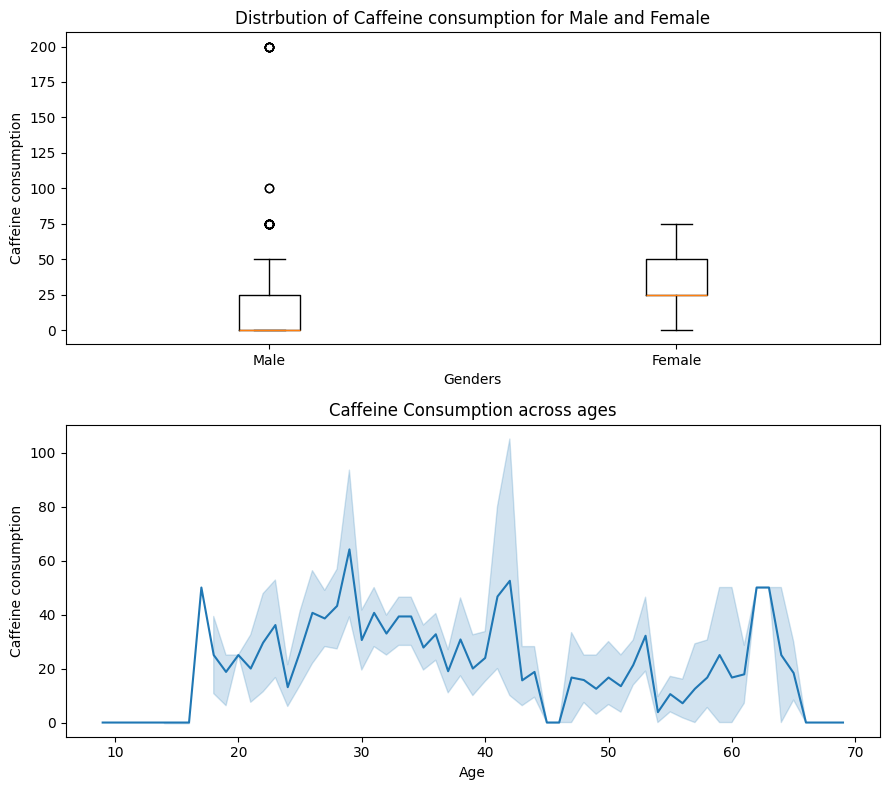

In [34]:
fig, axes = plt.subplots(2, 1, figsize=(9, 8))
axes[0].boxplot([df[df['Gender'] == 'Male']['Caffeine consumption'],
             df[df['Gender'] == 'Female']['Caffeine consumption']],
            labels=['Male', 'Female'])
axes[0].set_title('Distrbution of Caffeine consumption for Male and Female')
axes[0].set_xlabel('Genders')
axes[0].set_ylabel('Caffeine consumption')

sns.lineplot(data = df, x='Age', y='Caffeine consumption')
axes[1].set_title('Caffeine Consumption across ages')

plt.tight_layout()
plt.show()

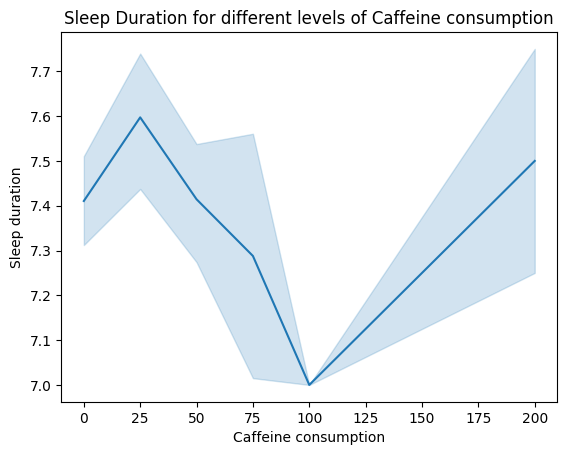

In [35]:
sns.lineplot(data = df, x='Caffeine consumption', y='Sleep duration')
plt.title('Sleep Duration for different levels of Caffeine consumption');

### Alcohol Consumption

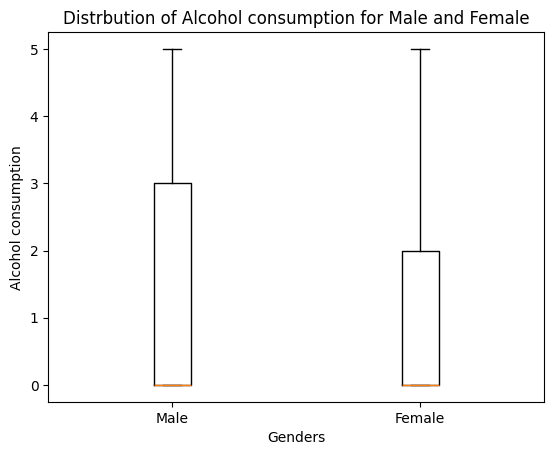

In [36]:
plt.boxplot([df[df['Gender'] == 'Male']['Alcohol consumption'],
             df[df['Gender'] == 'Female']['Alcohol consumption']],
            labels=['Male', 'Female'])
plt.title('Distrbution of Alcohol consumption for Male and Female')
plt.xlabel('Genders')
plt.ylabel('Alcohol consumption');

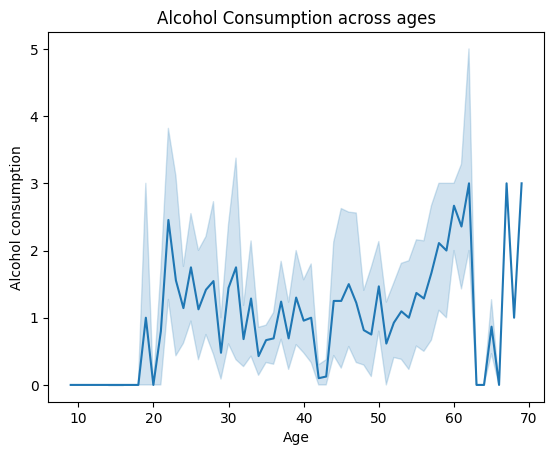

In [37]:
sns.lineplot(data = df, x='Age', y='Alcohol consumption')
plt.title('Alcohol Consumption across ages');

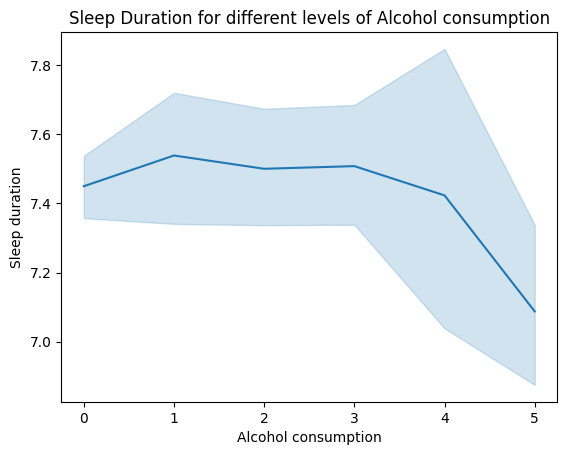

In [38]:
sns.lineplot(data = df, x='Alcohol consumption', y='Sleep duration')
plt.title('Sleep Duration for different levels of Alcohol consumption');


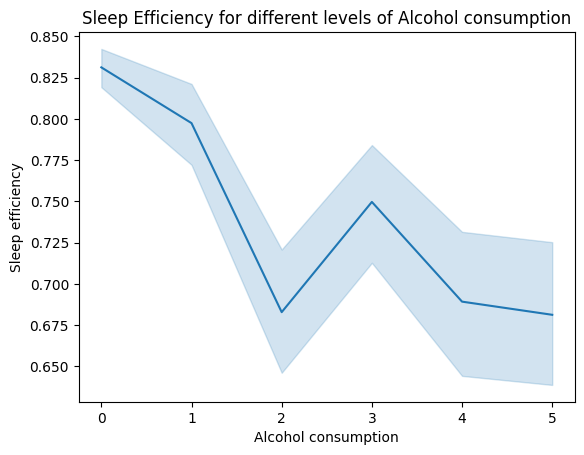

In [39]:
sns.lineplot(data = df, x='Alcohol consumption', y='Sleep efficiency')
plt.title('Sleep Efficiency for different levels of Alcohol consumption');

### Smoking Status

In [40]:
smoke_counts =df['Smoking status'].value_counts()
smoke_counts= pd.DataFrame(smoke_counts)
smoke_counts['Female'] = df[df['Gender']== 'Female']['Smoking status'].value_counts()
smoke_counts['Male'] = df[df['Gender']== 'Male']['Smoking status'].value_counts()
smoke_counts

,count,Female,Male
Smoking status,,,
No,409,222,187
Yes,209,77,132


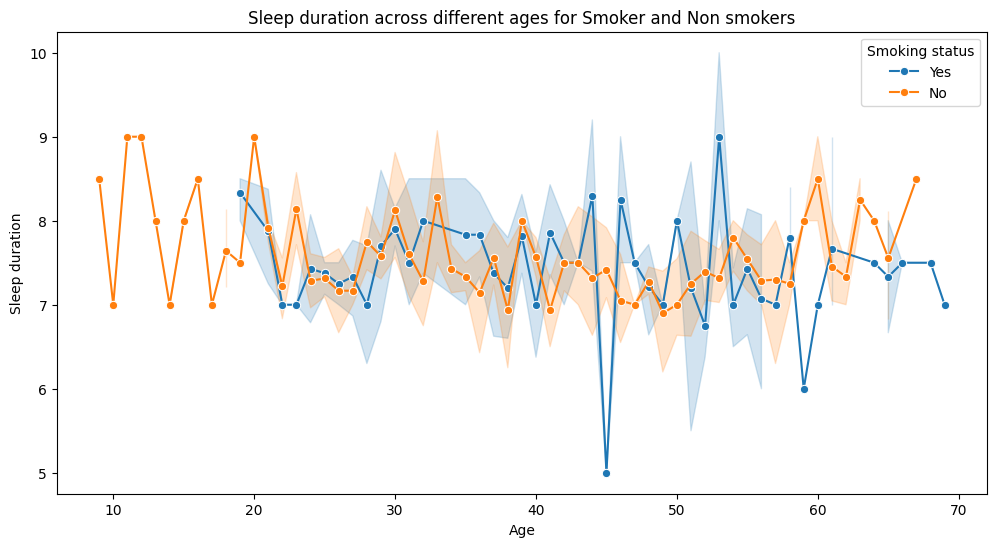

In [41]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='Sleep duration', hue='Smoking status', marker='o')
plt.title('Sleep duration across different ages for Smoker and Non smokers');

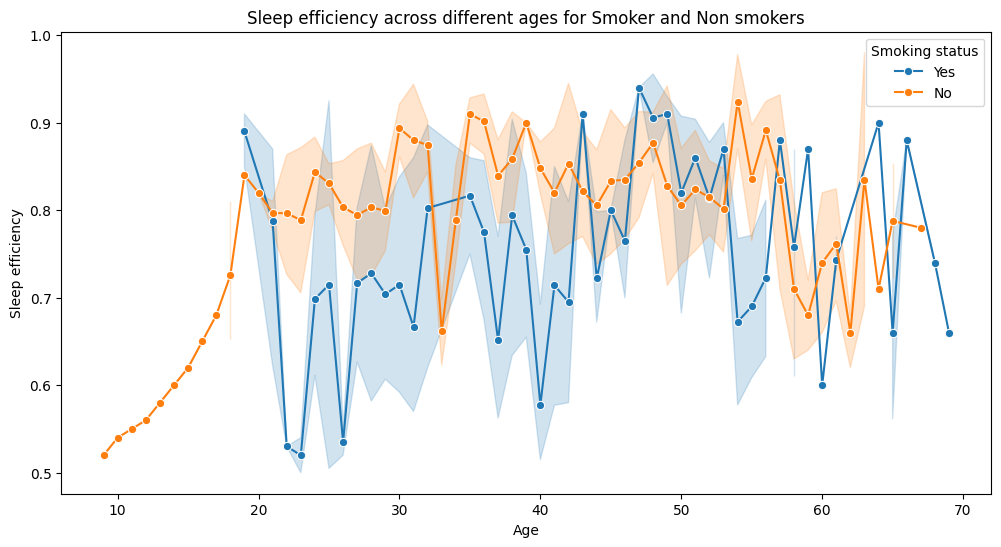

In [42]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Age', y='Sleep efficiency', hue='Smoking status', marker='o')
plt.title('Sleep efficiency across different ages for Smoker and Non smokers');

### Awakenings

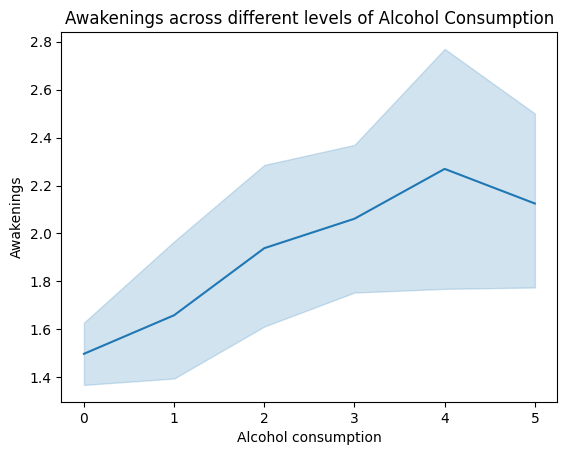

In [43]:
sns.lineplot(data= df, x='Alcohol consumption', y='Awakenings' )
plt.title('Awakenings across different levels of Alcohol Consumption');

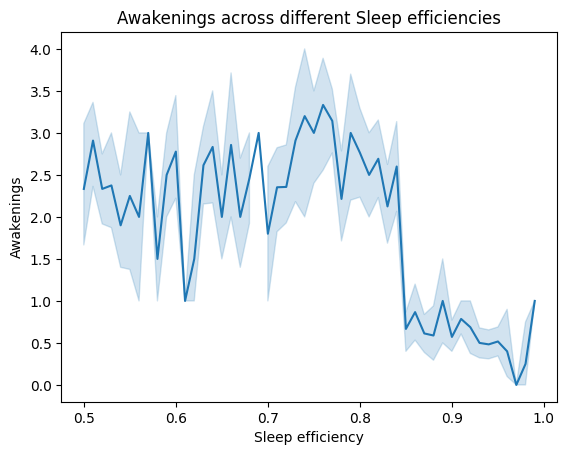

In [44]:
sns.lineplot(data= df, x='Sleep efficiency', y='Awakenings' )
plt.title('Awakenings across different Sleep efficiencies');

**Distribution of Awakenings for different levels of Caffeine Consumtion**

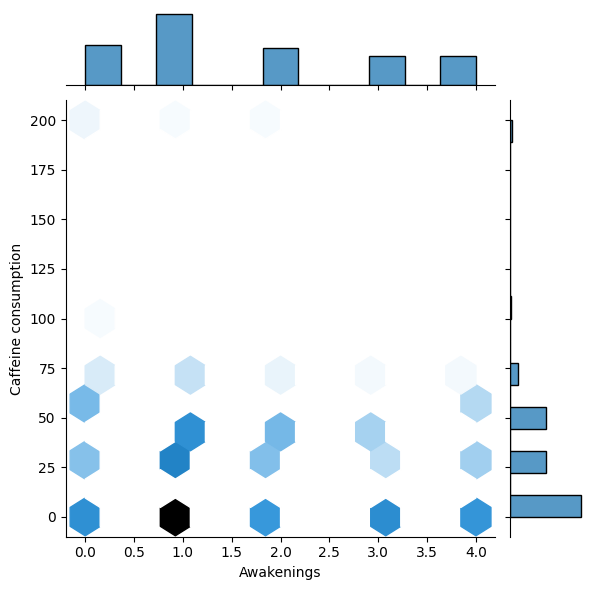

In [45]:
sns.jointplot(data=df, y='Caffeine consumption', x='Awakenings', kind='hex')
plt.show()

### Exercise frequency

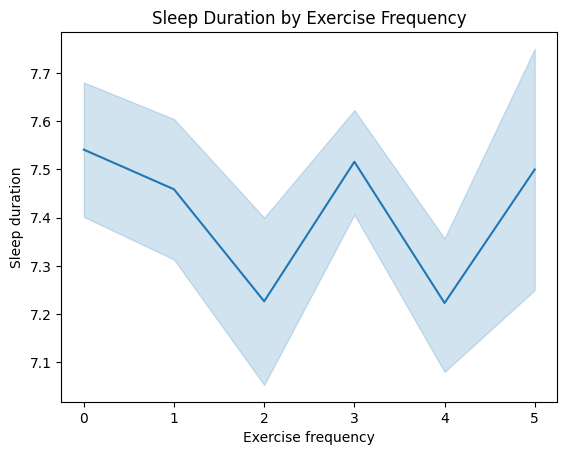

In [46]:
sns.lineplot(data= df, x='Exercise frequency', y='Sleep duration')
plt.title('Sleep Duration by Exercise Frequency');

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/1573593249.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Exercise frequency', y='Sleep duration' , palette='Set1')


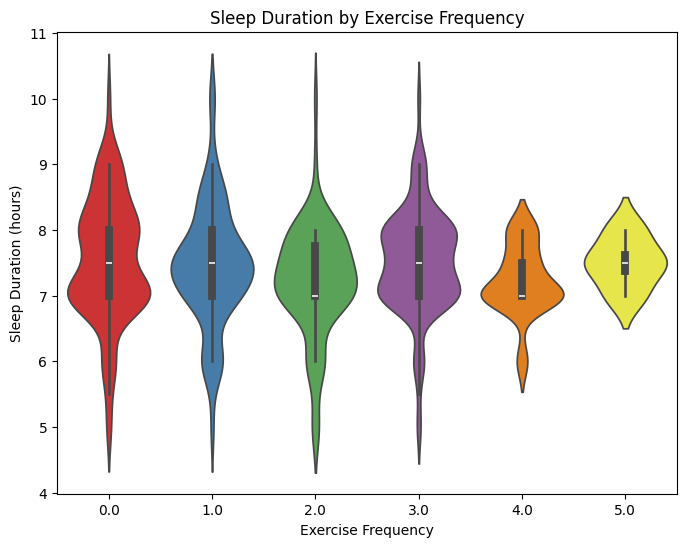

In [47]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='Exercise frequency', y='Sleep duration' , palette='Set1')
plt.title('Sleep Duration by Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Duration (hours)')

plt.show()

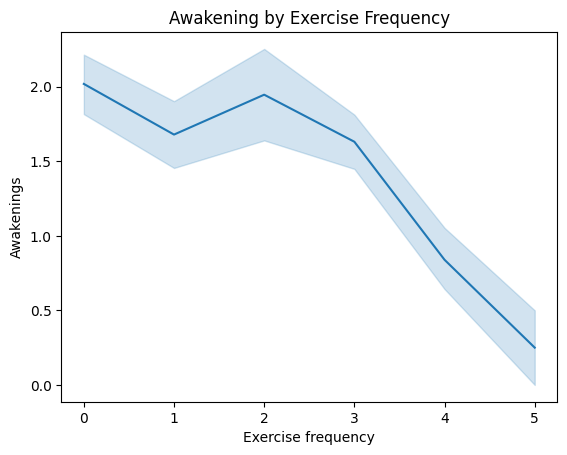

In [48]:
sns.lineplot(data= df, x='Exercise frequency', y='Awakenings')
plt.title('Awakening by Exercise Frequency');

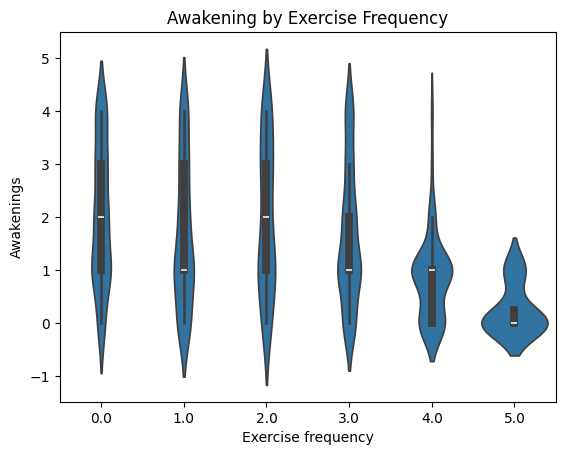

In [49]:
sns.violinplot(data= df, x='Exercise frequency', y='Awakenings')
plt.title('Awakening by Exercise Frequency');

# Problem Formulation

After visualizing and analyzing the data obtained, we now want to answer the question of: What could be the best model to predict a good or bad sleep based on the sleep features?

## Preparing the data

As part  of the Data Science lifecycle we come back to the stage of cleaning and preparing data to be used in the models and predictions. This preparation includes convering all of the values in the features to numerical ones and use One-hot encoding to use categorical data as features for our models. 

Sleep Efficiency threshold and feature selection was done on the basis of these refrences 
https://www.webmd.com/sleep-disorders/features/sleep-quality-socioeconomic-factors
https://www.thensf.org/what-is-sleep-quality/
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6286721/

### Creating the Good_Sleep feature
Categorizing Sleep efficiency into good sleep or bad sleep by choosing a threshold.

In [50]:
df['Good_Sleep'] = df['Sleep efficiency'].apply(lambda x: "Yes" if x > 0.65 else "No")

In [51]:
df.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Good_Sleep
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Yes
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Yes
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Yes
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,No
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Yes


In [52]:
cleaned_df_copy = df.copy()
cleaned_df_copy.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Good_Sleep
0,1,65,Female,06/03/2021 01:00,06/03/2021 07:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0,Yes
1,2,69,Male,05/12/2021 02:00,05/12/2021 09:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0,Yes
2,3,40,Female,25/05/2021 21:30,25/05/2021 05:30,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0,Yes
3,4,40,Female,03/11/2021 02:30,03/11/2021 08:30,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0,No
4,5,57,Male,13/03/2021 01:00,13/03/2021 09:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0,Yes


### Using Label Encoder to encode data into numerical values
We transform features with just 2 possible categories with numerical values of 1 or 0 

In [53]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

df['Gender'] = label.fit_transform(df['Gender'])
df['Smoking status'] = label.fit_transform(df['Smoking status'])
df['Good_Sleep'] = label.fit_transform(df['Good_Sleep'])

### Making groups of data according to age
We transfor Age into Categorical data into 6 age ranges to be used in the models

In [54]:
def merge_age_groups(age):
    if age <= 10:
        return 'Child'
    elif 10 < age <= 20:
        return 'Teenager'
    elif 20 < age <= 30:
        return 'Young Adult'
    elif 30 < age <= 40:
        return 'Adult'
    elif 40 < age <= 50:
        return 'Middle-Aged Adult'
    elif 50 < age <= 60:
        return 'Aged Adult'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(merge_age_groups)

/var/folders/5w/fm71pl_54mg4qv80mwd70chh0000gn/T/ipykernel_7808/3842944978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette='viridis')


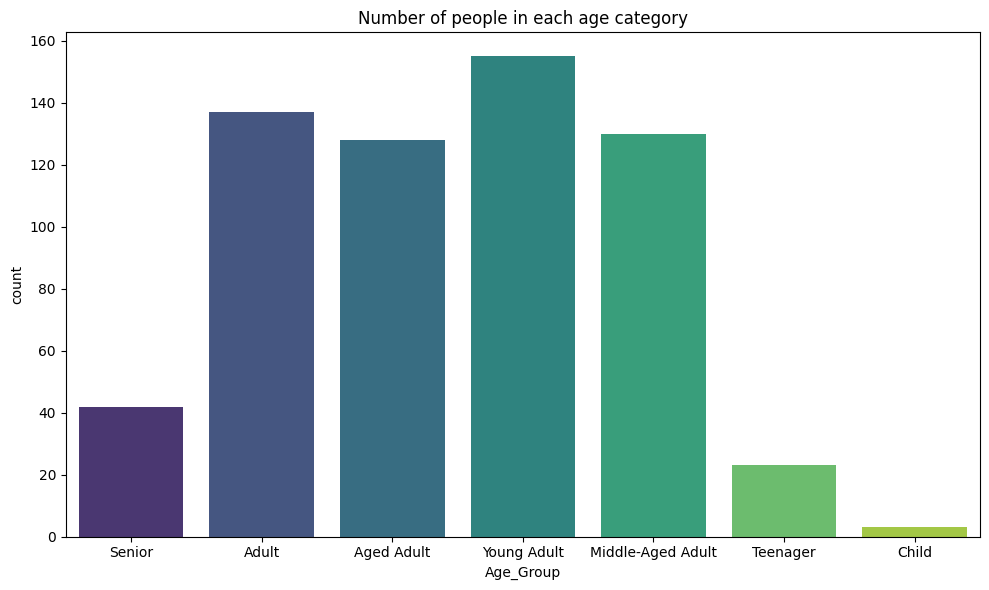

In [55]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', palette='viridis')
plt.title('Number of people in each age category')
plt.tight_layout() 

In [56]:
df['Caffeine consumption'].describe()

count    618.000000
mean      24.555016
std       31.391361
min        0.000000
25%        0.000000
50%       25.000000
75%       50.000000
max      200.000000
Name: Caffeine consumption, dtype: float64

### Feature scaling on data

In [57]:
df['Caffeine cup'] = df['Caffeine consumption'].apply(lambda x: x%10)
df['REM sleep percentage'] = df['REM sleep percentage'].apply(lambda x: x%10)
df['Deep sleep percentage'] = df['Deep sleep percentage'].apply(lambda x: x%10)
df['Light sleep percentage'] = df['Light sleep percentage'].apply(lambda x: x%10)

In [58]:
df['Sleep duration'] = df['Sleep duration'].round()

### Selecting the features chosen for the models and prediction
Based on our previosu analysis we prepare the data that will be used in the models with just the features selected. For this selection we used the visualizations previosuly shown and some references to determine these features as the most relevant in the prediction of our 'Good Sleep' feature. 

References: https://www.thensf.org/what-is-sleep-quality/ 

https://www.webmd.com/sleep-disorders/features/sleep-quality-socioeconomic-factors 

In [59]:
df.drop(columns=['ID','Bedtime','Wakeup time','Sleep efficiency','Age'],inplace=True)

In [60]:
df.iloc[:,8] = label.fit_transform(df.iloc[:,8])
df.iloc[:,10] = label.fit_transform(df.iloc[:,10])
print(df.head())

   Gender  Sleep duration  REM sleep percentage  Deep sleep percentage  \
0       0             6.0                     8                      0   
1       1             7.0                     9                      8   
2       0             8.0                     0                      0   
3       0             6.0                     3                      5   
4       1             8.0                     7                      5   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                       2         0.0                   0.0   
1                       3         3.0                   0.0   
2                       0         1.0                   0.0   
3                       2         3.0                  50.0   
4                       8         3.0                   0.0   

   Alcohol consumption  Smoking status  Exercise frequency  Good_Sleep  \
0                  0.0               1                 3.0           1   
1                  3.0      

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  618 non-null    int64  
 1   Sleep duration          618 non-null    float64
 2   REM sleep percentage    618 non-null    int64  
 3   Deep sleep percentage   618 non-null    int64  
 4   Light sleep percentage  618 non-null    int64  
 5   Awakenings              618 non-null    float64
 6   Caffeine consumption    618 non-null    float64
 7   Alcohol consumption     618 non-null    float64
 8   Smoking status          618 non-null    int64  
 9   Exercise frequency      618 non-null    float64
 10  Good_Sleep              618 non-null    int64  
 11  Age_Group               618 non-null    object 
 12  Caffeine cup            618 non-null    float64
dtypes: float64(6), int64(6), object(1)
memory usage: 62.9+ KB


### Getting dummy variables using One-Hot Encoding

In [62]:
encode_col_list = list(df.select_dtypes(include=['object']).columns)

for i in encode_col_list:
    # Perform one-hot encoding
    dummies = pd.get_dummies(df[i], prefix=i, drop_first=True)

    # Update values to 0s and 1s
    dummies = dummies.astype(int)

    # Concatenate the encoded columns to the DataFrame
    df = pd.concat([df, dummies], axis=1)

    # Drop the original column after encoding
    df.drop(i, axis=1, inplace=True)

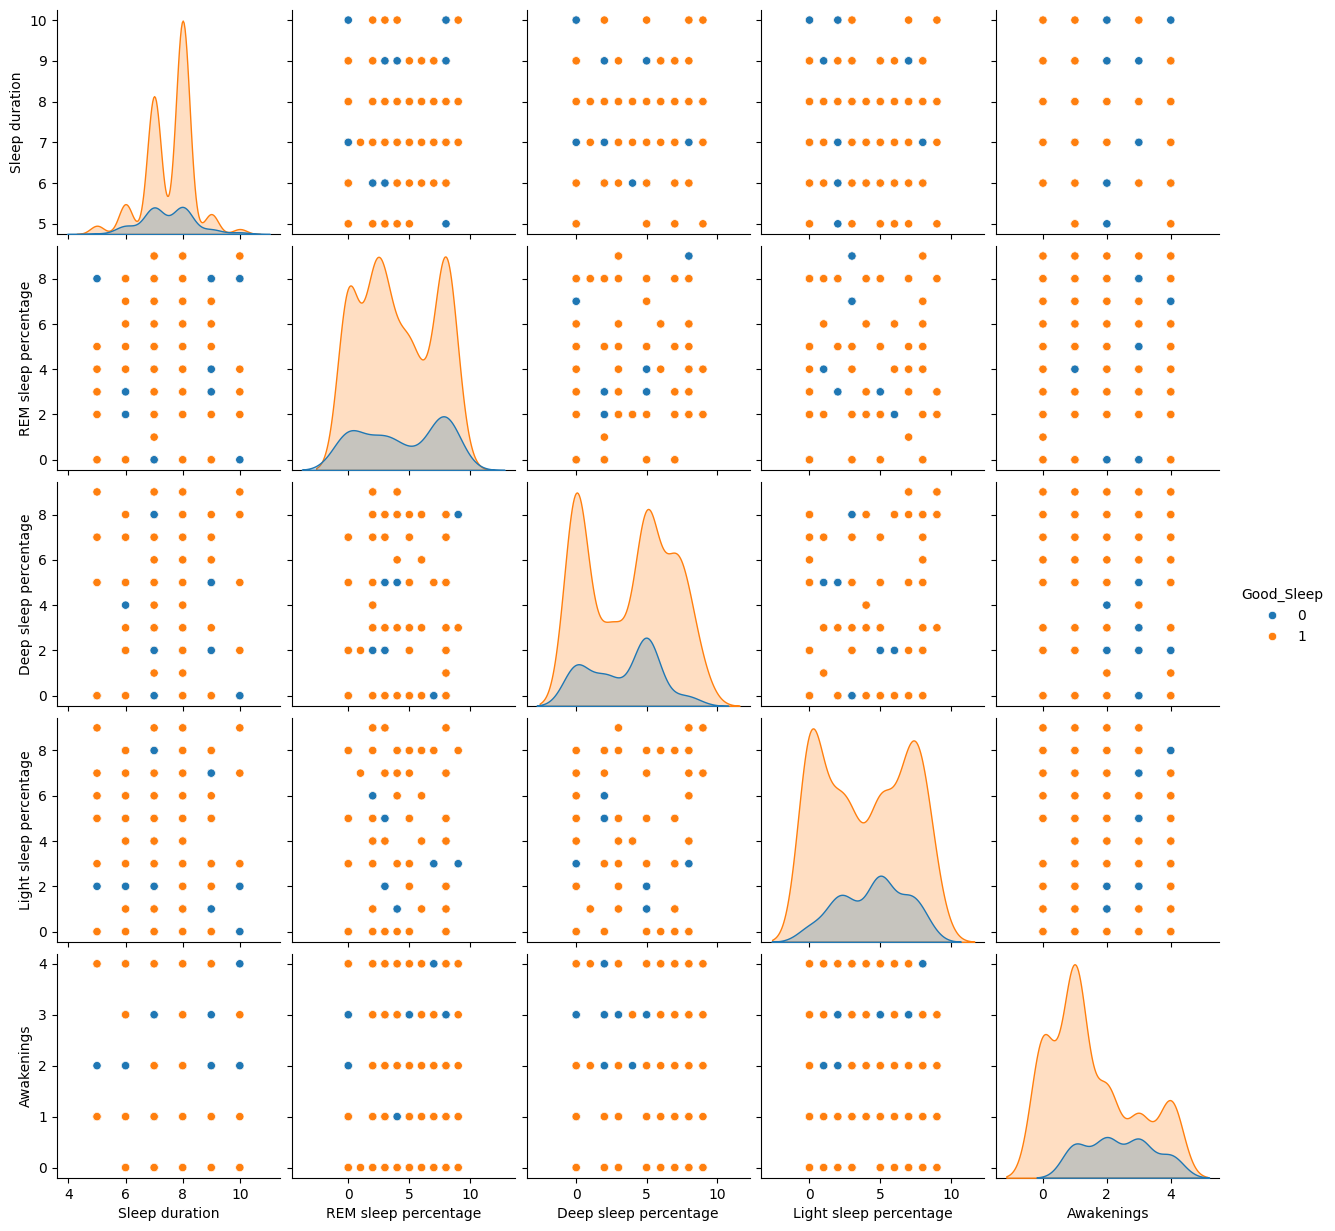

In [63]:
sns.pairplot(df, hue='Good_Sleep', vars=['Sleep duration', 'REM sleep percentage', 'Deep sleep percentage', 'Light sleep percentage', 'Awakenings'])
plt.show()


In [64]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np



# Calculate the average values for each feature grouped by 'Good_Sleep' category
average_values = df.groupby('Good_Sleep').mean().T
average_values.columns = ['average_poor_sleep', 'average_good_sleep']

# Now, prepare a DataFrame specifically for the radar chart with the calculated averages
chart_data = pd.DataFrame({
    'feature': average_values.index,
    'average_good_sleep': average_values['average_good_sleep'],
    'average_poor_sleep': average_values['average_poor_sleep']
})

# Create radar chart using the new DataFrame
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=chart_data['average_good_sleep'].tolist(),
    theta=chart_data['feature'].tolist(),
    fill='toself',
    name='Average Good Sleep'
))

fig.add_trace(go.Scatterpolar(
    r=chart_data['average_poor_sleep'].tolist(),
    theta=chart_data['feature'].tolist(),
    fill='toself',
    name='Average Poor Sleep'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, chart_data[['average_good_sleep', 'average_poor_sleep']].max().max()]
        )
    ),
    showlegend=True
)


fig.show()


# Prediction and Inference

### Defining our input and output values

In [65]:
y = df['Good_Sleep']
x = df.drop('Good_Sleep',axis=1)

### Dividing data into test and train sets using train_test_split

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Training Data Size: {len(X_train)}")
print(f"Test Data Size: {len(X_test)}")

Training Data Size: 494
Test Data Size: 124


### Getting idea of the best model and parameters for data using grid search

We tested 6 different models to compare them and choose the one with the best performance for our predictions. These models are: Support Vector Machine (SVM), Random Forest, Logistic Regression, K-Nearest Neighbors, AdaBoost Classifier and XGBoost Classifier. 

In [67]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,2,3,4,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,2,3,4,5,10]
        }
    },
    'k-neighbour' : {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,2,3,4,5,6,7],
            'p': [1,2]
        }
    },
    'AdaBoostClassifier' : {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [10,25,50]

        }
    },
    'XGBClassifier' : {
        'model': XGBClassifier(),
        'params':{
            'booster': ['gbtree','gblinear'],
            'base_score':[0.25,0.5,0.75,1],
            'max_depth':[2, 3, 5, 10, 15],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4]
        }
    }

}

In [68]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

dfa = pd.DataFrame(scores,columns=['model','best_score','best_params'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and w

In [69]:
dfa

,model,best_score,best_params
0,svm,0.925129,"{'C': 20, 'kernel': 'rbf'}"
1,random_forest,0.915007,{'n_estimators': 10}
2,logistic_regression,0.860359,{'C': 2}
3,k-neighbour,0.904865,"{'n_neighbors': 1, 'p': 1}"
4,AdaBoostClassifier,0.862420,{'n_estimators': 10}
5,XGBClassifier,0.927149,"{'base_score': 0.5, 'booster': 'gbtree', 'lear..."


The performance scores shown in the previous table indicates the proportion of the prediction that were correct for each model. From this we have decided to use the XGB Classifier as is the one that gave the best score. 

## Initializing our classification function

In [70]:
best_svm_model = XGBClassifier(**dfa.loc[dfa['model'] == 'XGBClassifier', 'best_params'].values[0])

### Fitting the data into classifier

In [71]:
best_svm_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Making prediction

In [72]:
y_pred = best_svm_model.predict(X_test)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1])

In [73]:
y_train


531    1
364    0
177    1
593    1
199    1
      ..
71     1
106    0
270    1
435    1
102    1
Name: Good_Sleep, Length: 494, dtype: int64

### Checking results and performance of model

In [74]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    """
    import itertools

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, np.round(cm[i, j], 2),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
class_names = ['False', 'True']


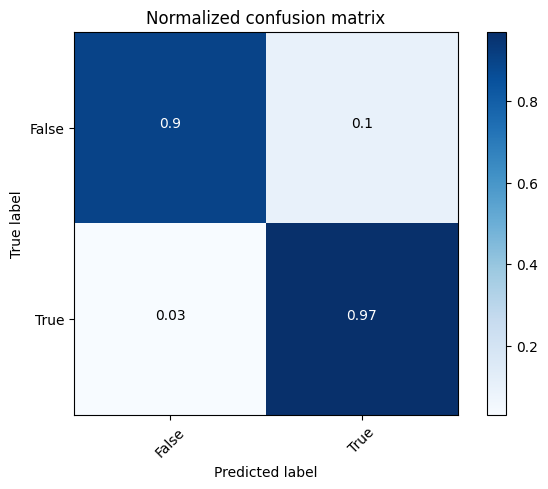

In [75]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
num = np.sum(conf_matrix, axis = 1, keepdims = True)
conf_matrix_norm = conf_matrix/num
plot_confusion_matrix(conf_matrix_norm, classes=class_names,
                       title='Normalized confusion matrix')


In [76]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)
#print("Classification Report:\n", classification_report(y_test, y_pred))

0.9758454106280193

In [77]:
import pandas as pd
y_pred_df = pd.DataFrame({'Predicted_Good_Sleep': y_pred})
# Create a new DataFrame with the predicted values
predicted_df = cleaned_df_copy.copy()

# Assign the predicted values to a new column in the new DataFrame
predicted_df['Predicted_Good_Sleep'] = y_pred_df

# Display the new DataFrame with predicted values
print(predicted_df.head(5))


   ID  Age  Gender           Bedtime       Wakeup time  Sleep duration  \
0   1   65  Female  06/03/2021 01:00  06/03/2021 07:00             6.0   
1   2   69    Male  05/12/2021 02:00  05/12/2021 09:00             7.0   
2   3   40  Female  25/05/2021 21:30  25/05/2021 05:30             8.0   
3   4   40  Female  03/11/2021 02:30  03/11/2021 08:30             6.0   
4   5   57    Male  13/03/2021 01:00  13/03/2021 09:00             8.0   

   Sleep efficiency  REM sleep percentage  Deep sleep percentage  \
0              0.88                    18                     70   
1              0.66                    19                     28   
2              0.89                    20                     70   
3              0.51                    23                     25   
4              0.76                    27                     55   

   Light sleep percentage  Awakenings  Caffeine consumption  \
0                      12         0.0                   0.0   
1                   

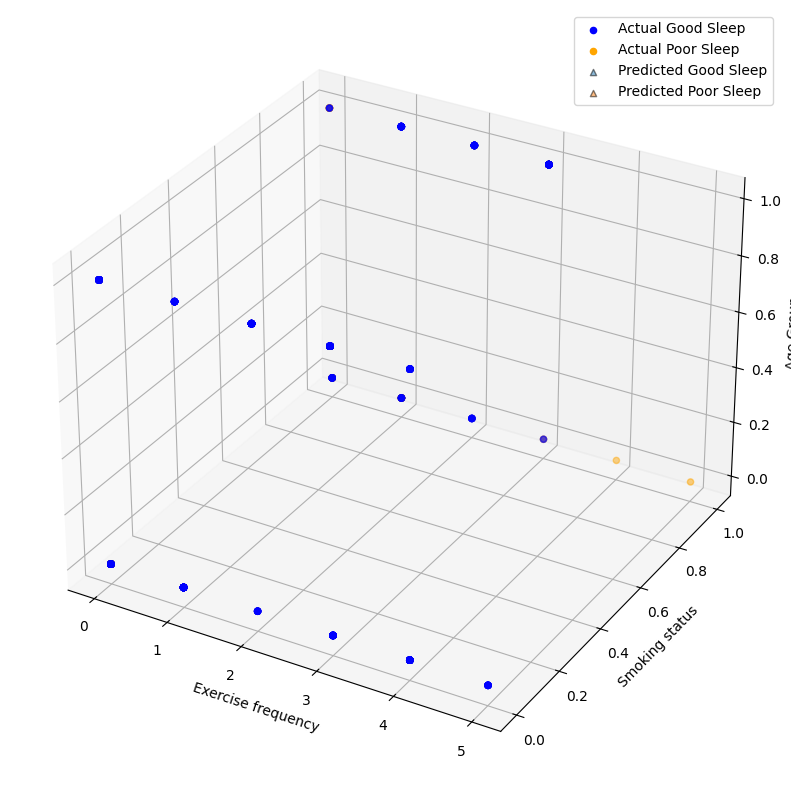

In [78]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


age_groups = ['Age_Group_Aged Adult', 'Age_Group_Child', 'Age_Group_Middle-Aged Adult', 'Age_Group_Senior', 'Age_Group_Teenager', 'Age_Group_Young Adult']
df['Age_Group'] = np.argmax(df[age_groups].values, axis=1)

# Now select your features for the axes
x = df['Exercise frequency']
y = df['Smoking status']  # This will be binary unless you encode smoking frequency
z = df['Gender']       # This will be a categorical variable we just created

# Actual and predicted 'Good Sleep' values
actual = df['Good_Sleep']
predicted = predicted_df['Good_Sleep']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
scat_actual_good = ax.scatter(x[actual==1], y[actual==1], z[actual==1], color='blue', label='Actual Good Sleep')
scat_actual_poor = ax.scatter(x[actual==0], y[actual==0], z[actual==0], color='orange', label='Actual Poor Sleep')

# Plotting predicted values
scat_predicted_good = ax.scatter(x[predicted==1], y[predicted==1], z[predicted==1], marker='^', alpha=0.5, label='Predicted Good Sleep', edgecolor='k')
scat_predicted_poor = ax.scatter(x[predicted==0], y[predicted==0], z[predicted==0], marker='^', alpha=0.5, label='Predicted Poor Sleep', edgecolor='k')

ax.set_xlabel('Exercise frequency')
ax.set_ylabel('Smoking status')
ax.set_zlabel('Age Group')

plt.legend()
plt.show()


In [79]:
import plotly.express as px


predicted_df['Predicted_Good_Sleep'] = predicted_df['Good_Sleep'].apply(lambda x: x if np.random.rand() > 0.1 else not x)

# Creating a 3D scatter plot
fig = px.scatter_3d(
    predicted_df,
    x='Exercise frequency',
    y='Smoking status',
    z='Gender',
    color='Good_Sleep',  # Actual good sleep status
    symbol='Predicted_Good_Sleep',  # Differentiates between predicted and actual
    labels={
        "Good_Sleep": "Actual Sleep Quality",
        "Predicted_Good_Sleep": "Predicted Sleep Quality"
    },
    title='3D Scatter Plot of Sleep Quality Predictions vs Actual Data'
)

# Enhance the look and feel of the plot
fig.update_layout(
    legend_title_text='Sleep Quality',
    scene=dict(
        xaxis_title='Sleep Duration (hrs)',
        yaxis_title='REM Sleep Percentage (%)',
        zaxis_title='Deep Sleep Percentage (%)',
        xaxis=dict(backgroundcolor="rgb(200, 200, 230)"),
        yaxis=dict(backgroundcolor="rgb(230, 200,230)"),
        zaxis=dict(backgroundcolor="rgb(230, 230,200)")
    )
)

# Show the plot
fig.show()


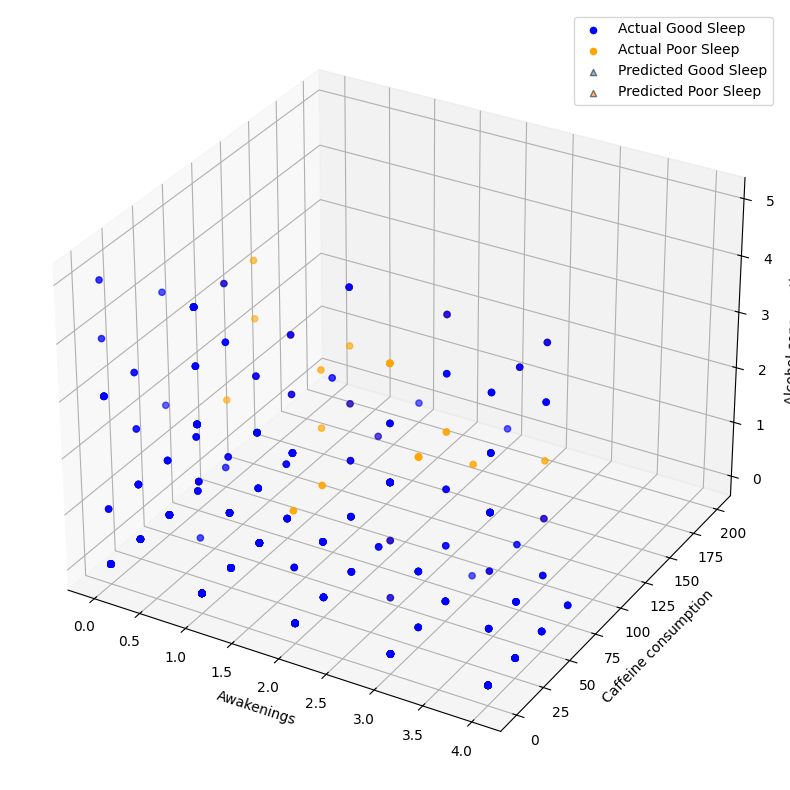

In [80]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Select your features for the axes
x = df['Awakenings']
y = df['Caffeine consumption']
z = df['Alcohol consumption']

# Actual and predicted 'Good Sleep' values
actual = df['Good_Sleep']
predicted = predicted_df['Good_Sleep']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
scat_actual_good = ax.scatter(x[actual==1], y[actual==1], z[actual==1], color='blue', label='Actual Good Sleep')
scat_actual_poor = ax.scatter(x[actual==0], y[actual==0], z[actual==0], color='orange', label='Actual Poor Sleep')

# Plotting predicted values
scat_predicted_good = ax.scatter(x[predicted==1], y[predicted==1], z[predicted==1], marker='^', alpha=0.5, label='Predicted Good Sleep', edgecolor='k')
scat_predicted_poor = ax.scatter(x[predicted==0], y[predicted==0], z[predicted==0], marker='^', alpha=0.5, label='Predicted Poor Sleep', edgecolor='k')

ax.set_xlabel('Awakenings')
ax.set_ylabel('Caffeine consumption')
ax.set_zlabel('Alcohol consumption')

plt.legend()
plt.show()


In [81]:
import plotly.express as px


predicted_df['Predicted_Good_Sleep'] = predicted_df['Good_Sleep'].apply(lambda x: x if np.random.rand() > 0.1 else not x)

# Creating a 3D scatter plot
fig = px.scatter_3d(
    predicted_df,
    x='Awakenings',
    y='Caffeine consumption',
    z='Alcohol consumption',
    color='Good_Sleep',  # Actual good sleep status
    symbol='Predicted_Good_Sleep',  # Differentiates between predicted and actual
    labels={
        "Good_Sleep": "Actual Sleep Quality",
        "Predicted_Good_Sleep": "Predicted Sleep Quality"
    },
    title='3D Scatter Plot of Sleep Quality Predictions vs Actual Data'
)

# Enhance the look and feel of the plot
fig.update_layout(
    legend_title_text='Sleep Quality',
    scene=dict(
        xaxis_title='Sleep Duration (hrs)',
        yaxis_title='REM Sleep Percentage (%)',
        zaxis_title='Deep Sleep Percentage (%)',
        xaxis=dict(backgroundcolor="rgb(200, 200, 230)"),
        yaxis=dict(backgroundcolor="rgb(230, 200,230)"),
        zaxis=dict(backgroundcolor="rgb(230, 230,200)")
    )
)

# Show the plot
fig.show()


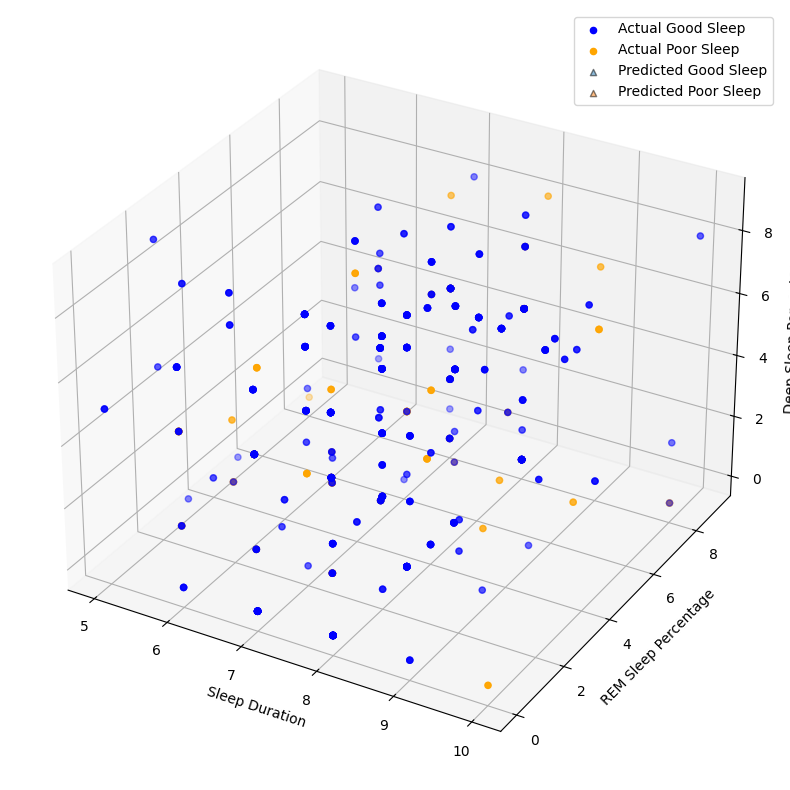

In [82]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



# Select your features for the axes
x = df['Sleep duration']
y = df['REM sleep percentage']
z = df['Deep sleep percentage']

# Actual and predicted values
actual = df['Good_Sleep']
predicted = predicted_df['Good_Sleep']

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plotting actual values
scat_actual = ax.scatter(x[actual==1], y[actual==1], z[actual==1], color='blue', label='Actual Good Sleep')
scat_actual = ax.scatter(x[actual==0], y[actual==0], z[actual==0], color='orange', label='Actual Poor Sleep')

# Plotting predicted values
scat_predicted = ax.scatter(x[predicted==1], y[predicted==1], z[predicted==1], marker='^', alpha=.5, label='Predicted Good Sleep', edgecolor='k')
scat_predicted = ax.scatter(x[predicted==0], y[predicted==0], z[predicted==0], marker='^', alpha=.5, label='Predicted Poor Sleep', edgecolor='k')

ax.set_xlabel('Sleep Duration')
ax.set_ylabel('REM Sleep Percentage')
ax.set_zlabel('Deep Sleep Percentage')

plt.legend()
plt.show()



In [83]:
import plotly.express as px


predicted_df['Predicted_Good_Sleep'] = predicted_df['Good_Sleep'].apply(lambda x: x if np.random.rand() > 0.1 else not x)

# Creating a 3D scatter plot
fig = px.scatter_3d(
    predicted_df,
    x='Sleep duration',
    y='REM sleep percentage',
    z='Deep sleep percentage',
    color='Good_Sleep',  # Actual good sleep status
    symbol='Predicted_Good_Sleep',  # Differentiates between predicted and actual
    labels={
        "Good_Sleep": "Actual Sleep Quality",
        "Predicted_Good_Sleep": "Predicted Sleep Quality"
    },
    title='3D Scatter Plot of Sleep Quality Predictions vs Actual Data'
)

# Enhance the look and feel of the plot
fig.update_layout(
    legend_title_text='Sleep Quality',
    scene=dict(
        xaxis_title='Sleep Duration (hrs)',
        yaxis_title='REM Sleep Percentage (%)',
        zaxis_title='Deep Sleep Percentage (%)',
        xaxis=dict(backgroundcolor="rgb(200, 200, 230)"),
        yaxis=dict(backgroundcolor="rgb(230, 200,230)"),
        zaxis=dict(backgroundcolor="rgb(230, 230,200)")
    )
)

# Show the plot
fig.show()


Saving the model so that it could be used by front end and backend 

In [84]:
import pickle

# Save the SVM model to disk
with open('best_svm_model.pkl', 'wb') as file:
    pickle.dump(best_svm_model, file)